# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [3]:
# ================== functions =========================================
# 1. Data types
def data_types_list(data):
    # Get data types of all colums
    data_types = data.dtypes

    # 
    datetime_columns = []
    categorical_columns = []
    numerical_columns = []
    # Separate columns into categorical and numeric
    for col in data.columns:
        if data[col].dtype == 'datetime64[ns]':
            datetime_columns.append(col)
        elif data[col].dtype == 'object':
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
            
    return datetime_columns,categorical_columns, numerical_columns
    
    #date_time_columns = data_types[data.dtypes == 'datetime64[ns]'].index.tolist()
    #categorical_columns = data_types[data_types == 'object'].index.tolist()
    #numerical_columns = data_types[(data_types != 'object') or (data_types != 'datetime64[ns]')].index.tolist()
    

# 2. Are there null values in dataset
def data_null_check(data):
    
    if data.isnull().any().any():
        # calculate the total number of rows in the data
        total_rows = len(data)
        # create an empty list called 'columns_with_null' to store information about columns with nill values
        columns_with_null = []
        # Loop through each column to count the number of null value and calculate the percentage of null values relative to the total number of rows.
        for column in data.columns:
            null_count = data[column].isnull().sum()
            if null_count >0:
                columns_with_null.append(column, null_count, null_count/total_rows*100)
        # convert 'columns_with_null' to a new DataFrame called 'columns_with_null_df' for easier viewing
        columns_with_null_df = pd.DataFrame(columns_with_null, columns = ['Column N','Null Count','Null Percentage'])
    
        # Return result
        return columns_with_null_df
        print(columns_with_null_df)
    
    else:
        print('There are no null values in the dataset')
# . Results
def show_results(data):
    # 1. Data_types => return 2 lists of categorical and numeric features in the dataset
    datetime_columns, categorical_columns, numerical_columns = data_types_list(data)
    print('1. Overview the structure of dataset')
    print(' - Total columns in the dataset: {} , in which:'.format(data.shape[1]))
    print(' - Datetime Columns: {} are list in a variable name - datetime_columns '.format(len(datetime_columns)))
    print(' - Categorical Columns: {} are list in a variable name - categorical_columns '.format(len(categorical_columns)))
    print(' - Numeric Columns    : {} are list in a variable name - numerical_columns '.format(len(numerical_columns)))
    print('----------------------------------------')
    print('2. Check null values')
    columns_with_null_df = data_null_check(data)
    print(columns_with_null_df)


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


## 1. day_weather

In [4]:
# Load data set
dataset = 'df_day (1).csv'
day_weather = pd.read_csv(dataset)
day_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      335 non-null    object 
 1   maxtemp_c       335 non-null    float64
 2   maxtemp_f       335 non-null    float64
 3   mintemp_c       335 non-null    float64
 4   mintemp_f       335 non-null    float64
 5   avgtemp_c       335 non-null    float64
 6   avgtemp_f       335 non-null    float64
 7   maxwind_mph     335 non-null    float64
 8   maxwind_kph     335 non-null    float64
 9   totalprecip_mm  335 non-null    float64
 10  totalprecip_in  335 non-null    float64
 11  avgvis_km       335 non-null    float64
 12  avgvis_miles    335 non-null    int64  
 13  avghumidity     335 non-null    int64  
 14  condition       335 non-null    object 
 15  uv              335 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 42.0+ KB


In [5]:
# Rename the 'Unnamed: 0' column to 'date'
day_weather.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
day_weather['date'] = pd.to_datetime(day_weather['date'])
day_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            335 non-null    datetime64[ns]
 1   maxtemp_c       335 non-null    float64       
 2   maxtemp_f       335 non-null    float64       
 3   mintemp_c       335 non-null    float64       
 4   mintemp_f       335 non-null    float64       
 5   avgtemp_c       335 non-null    float64       
 6   avgtemp_f       335 non-null    float64       
 7   maxwind_mph     335 non-null    float64       
 8   maxwind_kph     335 non-null    float64       
 9   totalprecip_mm  335 non-null    float64       
 10  totalprecip_in  335 non-null    float64       
 11  avgvis_km       335 non-null    float64       
 12  avgvis_miles    335 non-null    int64         
 13  avghumidity     335 non-null    int64         
 14  condition       335 non-null    object        
 15  uv    

In [6]:
# describe the dataset (len, shape)

shape = day_weather.shape
print('-----------------------------')
print('The structure of the dataset:')
print('-----------------------------')
print('The number of observations: ', shape[0])
print('the number of features: ', shape[1])
print('')
# Execute the step: summary statistics
sum_stats = day_weather.describe()
print('Summary Statistics:\n',sum_stats)

-----------------------------
The structure of the dataset:
-----------------------------
The number of observations:  335
the number of features:  16

Summary Statistics:
         maxtemp_c   maxtemp_f   mintemp_c   mintemp_f   avgtemp_c   avgtemp_f  \
count  335.000000  335.000000  335.000000  335.000000  335.000000  335.000000   
mean    32.901194   91.205373   24.399701   75.917910   27.817015   82.071642   
std      2.868495    5.159443    1.761506    3.168025    1.775510    3.193229   
min     24.200000   75.600000   19.600000   67.300000   23.000000   73.500000   
25%     31.200000   88.150000   23.300000   73.900000   26.600000   79.900000   
50%     32.600000   90.700000   24.300000   75.700000   27.900000   82.100000   
75%     34.500000   94.150000   25.700000   78.300000   29.050000   84.250000   
max     40.100000  104.200000   28.800000   83.800000   32.300000   90.100000   

       maxwind_mph  maxwind_kph  totalprecip_mm  totalprecip_in   avgvis_km  \
count   335.000000

In [7]:
# ================= results ===============================================
show_results(day_weather)

1. Overview the structure of dataset
 - Total columns in the dataset: 16 , in which:
 - Datetime Columns: 1 are list in a variable name - datetime_columns 
 - Categorical Columns: 1 are list in a variable name - categorical_columns 
 - Numeric Columns    : 14 are list in a variable name - numerical_columns 
----------------------------------------
2. Check null values
There are no null values in the dataset
None


### What is the structure of your dataset?

> Description: the dataset has a total of 15 columns, each representing specific weather-related features recorded over time. It appears to be organized in a tabular format with rows representing different dates and times at which the weather data was recorded. This tabular structure is commonly used for storing and analyzing structured data, making it suitable for various data analysis tasks, including time series analysis and weather pattern identification.

### What is/are the main feature(s) of interest in your dataset?

> Based on the provided segments of the dataset, the main features of interest appear to be related to weather and enviromental conditions. These features include:
1. Date and Time information: The date and time columns are essential for understanding when each weather observation was recorded.

2. Date Weather Parameters: Various weather-related parameters such as:
2.1 Temperature data:
* Maximun Temperature (maxtemp_c, maxtemp_f)
* Minimun Temperature (mintemp_c, mintemp_f)
* Average Temperature (avgtemp_c, avgtemp_f)
2.2 Wind data:
* Max wind Speed (maxwind_mph, maxwind_kph)
2.3 Precipitation data:
* Total Precipitation ( totalprecip_mm, totalprecip_in)
2.4 Visibility data:
* Average Visibility (avgvis_km, avgvis_miles)
2.5 Humidity data:
* Average Humidity (avghumidity)
2.6 Condition data:
* Weather Conditions Descriptions (conditiontext)
* Weather Condition Icons (condition.icon)
* Weather Condition Codes (conditionscode)
2.7 UV index
* Ultraviolet (UV) index 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To determine which features in the dataset will support the investigation of temperature-related features, we need to consider the nature of weather data and how temperature is influced by various factors. Here are some key features that are likely to be relevant in understanding temperature variations:
1. Date and Time information: Date and time features can help identify daily, monthly, and seasonal patterns in temperature. These features include columns like 'hourtime', 'astro.sunrise', 'astro.sunset', and 'astromoonrise'.

2. Weather Conditions: Weather conditions can significantly impact temperature. Columns such as 'conditiontext','condition.icon', and 'conditioncode' provide information about the current weather conditions, which can be correlated with temperature.

3. Wind data: Wind speed and directon can affect temperature. Features like 'maxwind_mph', 'maxwind_kph', 'hour.wind_mph', and 'hour.wind_kph' can help analyze the relationship between wind and temperature.

4. Precipitation data: To study precipitation patterns, total Precipitation in millimeters and inches (totalprecip_mm, totalprecip_in) can provide valuable insights.

5. Visibility and Humidity data: Average Visibility (avgvis_km, avgvis_miles) and Average Humidity (avghumidity) can be helpful for understanding visibility and humidity trens.

6. UV Index: UV Index (uv) is important for assessing the level of ultraviolet radiation, which can be valuable for health-related analyses.

In [8]:
day_weather.head()

,date,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
0,2022-10-01,28.9,83.9,24.2,75.6,25.6,78.1,5.8,9.4,8.4,0.33,8.5,5,90,Moderate or heavy rain shower,6
1,2022-10-02,27.3,81.1,23.9,75.0,25.0,77.1,4.9,7.9,6.7,0.26,7.9,4,92,Moderate rain at times,6
2,2022-10-03,31.5,88.7,23.8,74.8,26.9,80.4,7.2,11.5,9.0,0.35,9.9,6,82,Moderate or heavy rain shower,7
3,2022-10-04,31.6,88.9,24.2,75.6,26.9,80.4,6.7,10.8,4.6,0.18,9.8,6,83,Heavy rain at times,7
4,2022-10-05,31.3,88.3,24.0,75.2,27.1,80.7,8.1,13.0,12.9,0.51,10.0,6,81,Moderate or heavy rain shower,7


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Univariate Exploration for numerical columns

In [9]:
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)
numerical_columns

['maxtemp_c',
 'maxtemp_f',
 'mintemp_c',
 'mintemp_f',
 'avgtemp_c',
 'avgtemp_f',
 'maxwind_mph',
 'maxwind_kph',
 'totalprecip_mm',
 'totalprecip_in',
 'avgvis_km',
 'avgvis_miles',
 'avghumidity',
 'uv']

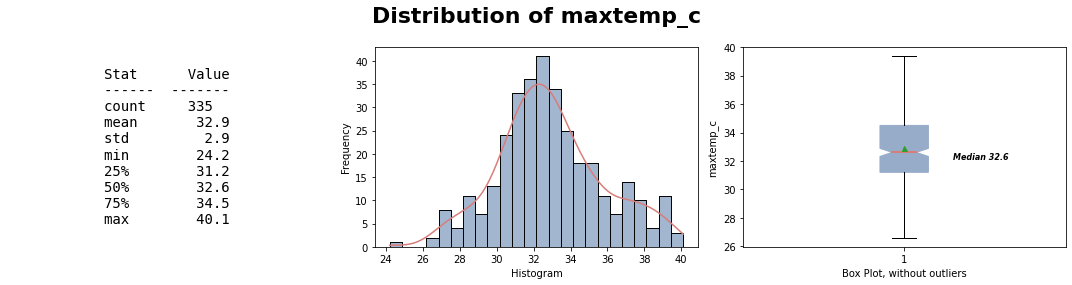

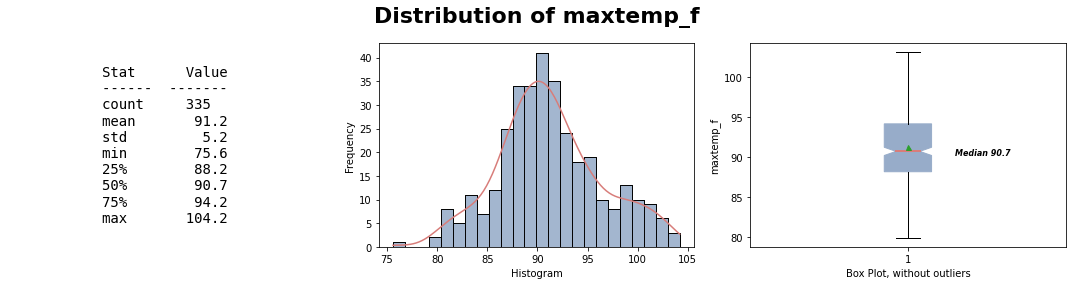

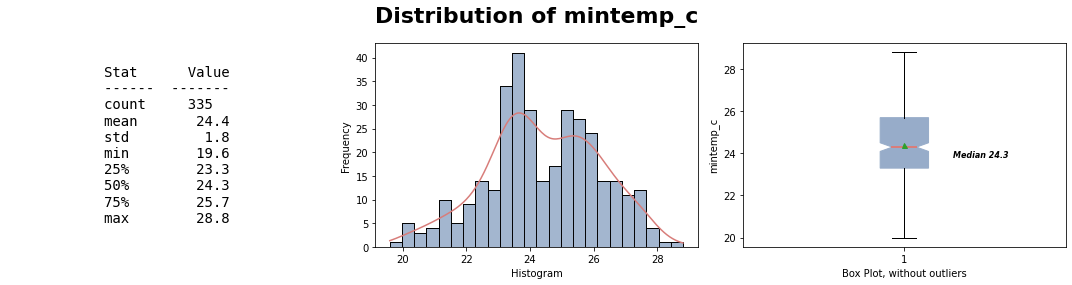

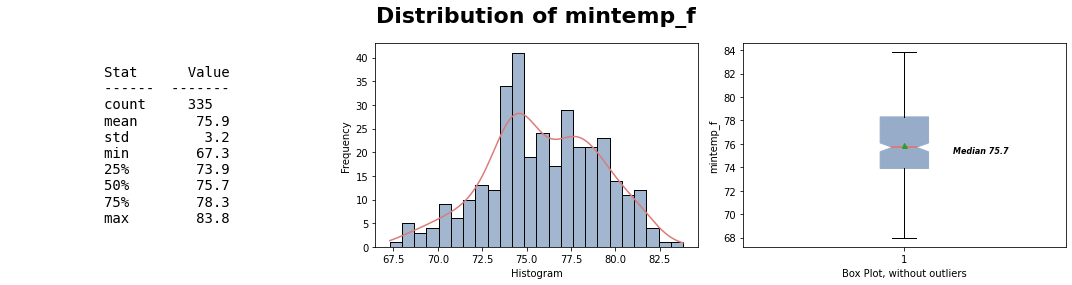

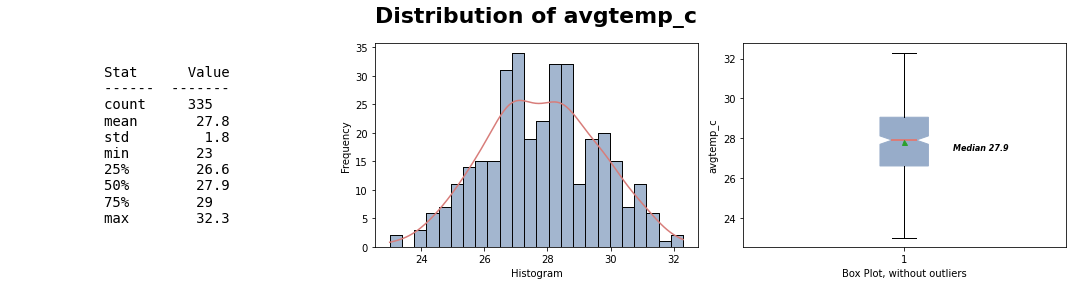

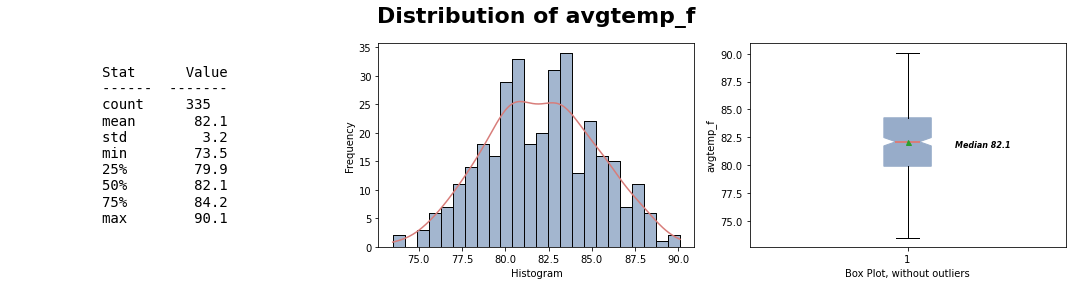

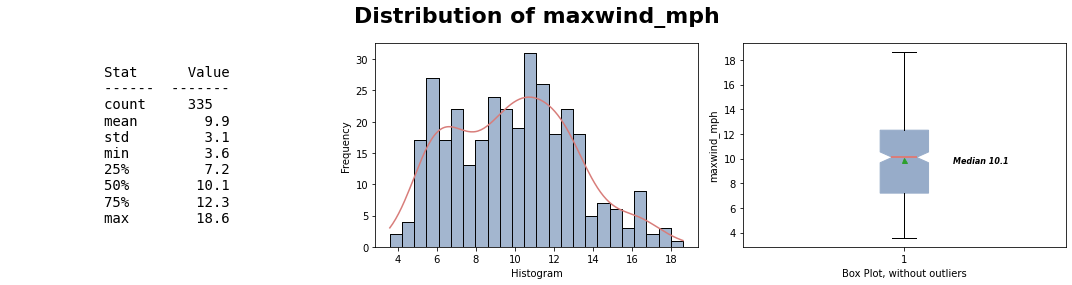

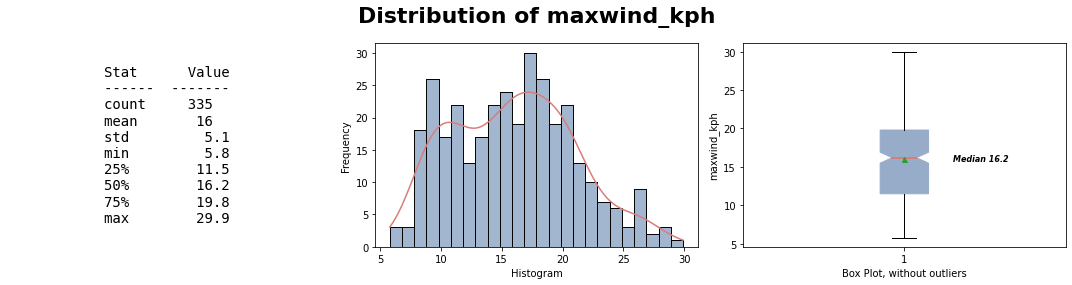

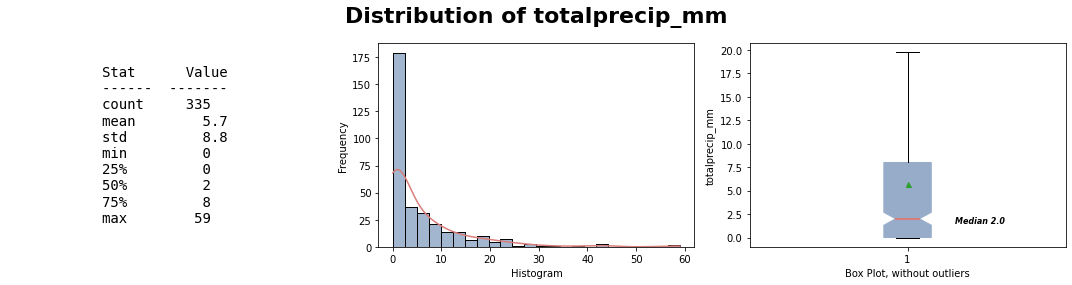

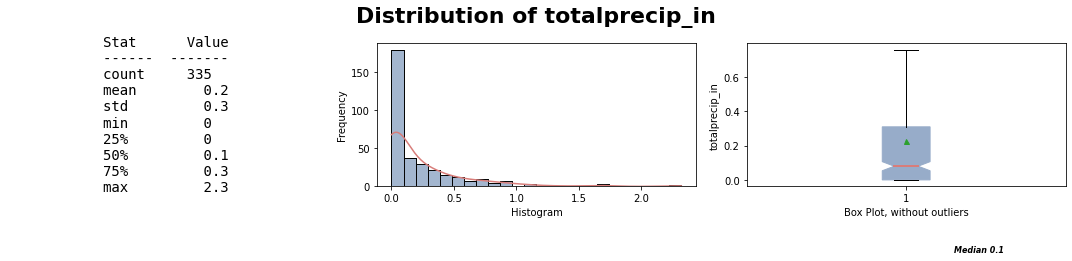

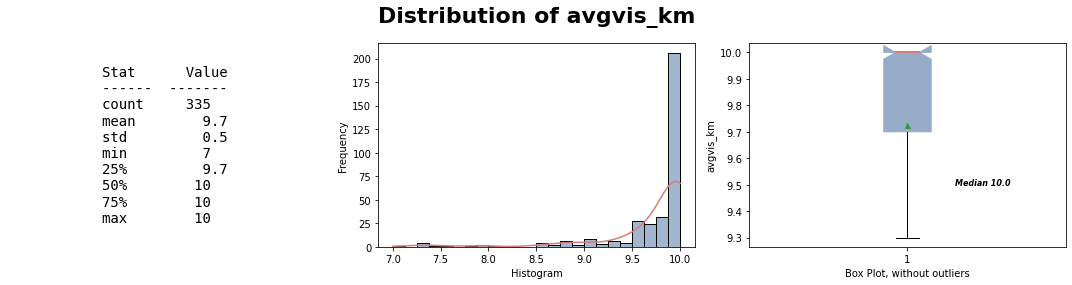

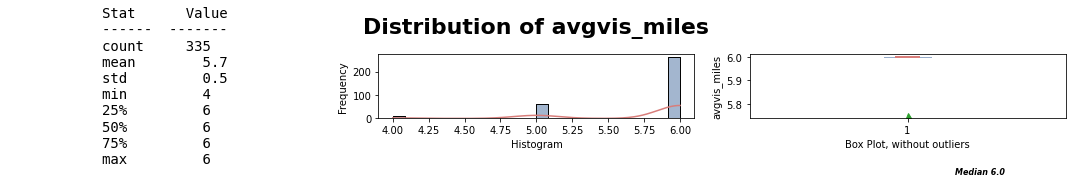

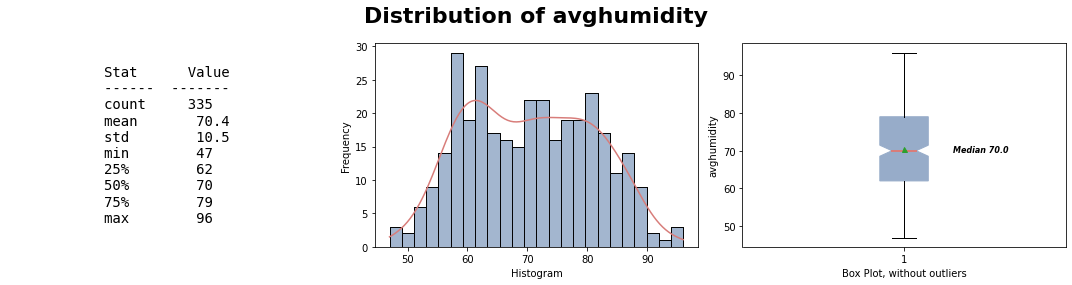

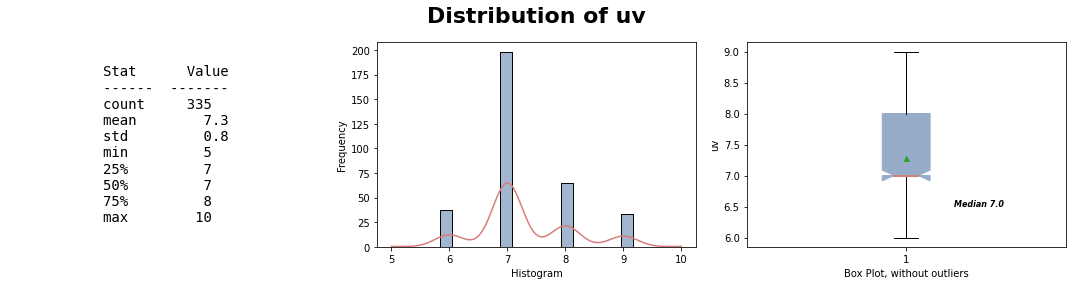

In [10]:
# create a function for Univariate Exploration 
# used for number - numeric_columns
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)

#numeric_columns = [maxtemp_c]

def Uni_analysis_num_cols(data):
    datetime_columns, categorical_columns, numerical_columns = data_types_list(data)
    #numeric_columns = ['maxtemp_c']
    for col in numerical_columns:
        # set up the figure with 3 subplots 
        plt.figure(figsize=(15,4))
        plt.suptitle ('Distribution of {}'.format(col),fontweight = 'bold', color = 'black', fontsize=22)
        plt.gcf().autofmt_xdate()
    
        # Subplot 1: Statistical summary
        plt.subplot(1,3,1)
                              
        # Create a statistical summary 
        stats_summary = data[col].describe().reset_index()
        stats_summary.columns = ['Stat','Value']
        stats_summary['Value']= stats_summary['Value'].round(1)
                      
        stats_tbl = tabulate(stats_summary, headers = ['Stat','Value'], tablefmt='simple', showindex=False)
        plt.text(0.3,0.5, stats_tbl, va='center', fontfamily='monospace',fontsize=14)
        plt.axis('off')
        plt.xlabel('Statictis Summary')
        
        # Subplot 2:
        # Subplot 2: Histogram
        plt.subplot(1,3,2)

        # Create a histogram
        sns.histplot(data=data, x=col, bins=24, kde=True, color ='#97acc9', line_kws={'color':'#D87D7A'})
        #sns.kdeplot(data=trip_data, x='start_hour',color = '#D87D7A')
        ax = sns.histplot(data=data, x=col, bins=24, kde=False, color ='#97acc9', line_kws={'color':'#D87D7A','lw':5})
        ax.lines[0].set_color('#D87D7A')
        ax.lines[0].set_linewidth(1.5)
        #ax.lines[0].set_marker(5)
        plt.xlabel('Hour of Day')
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.xlabel('Histogram')
        plt.ylabel('Frequency')
        
        # Subplot 3: Box plot
        plt.subplot(1,3,3)
        plt.boxplot(data[col], patch_artist = True,notch ='True', vert = 1,showfliers=False
                    ,boxprops=dict(facecolor='#97acc9', color='#97acc9')
                    ,showmeans=True, meanprops=dict(color='#D87D7A',markersize=5)
                    ,medianprops=dict(color='#D87D7A',linewidth=2))
        mu = data[col].mean()
        sigma = data[col].std()
        median = data[col].quantile(q=.5)
        plt.text(1.15, median-0.5,'Median {:,.1f} '.format(median), style='italic', fontweight = 'bold',fontsize =8)
        #plt.text(1.15, mu-0.5,'Mean {:,.1f} '.format(mu), style='italic', fontweight = 'bold',fontsize =8)
        plt.ylabel(col)
        plt.xlabel('Box Plot, without outliers')

        plt.tight_layout()
        plt.show()
        
# Show the results
Uni_analysis_num_cols(day_weather)


### Univariate Exploration for categorical columns

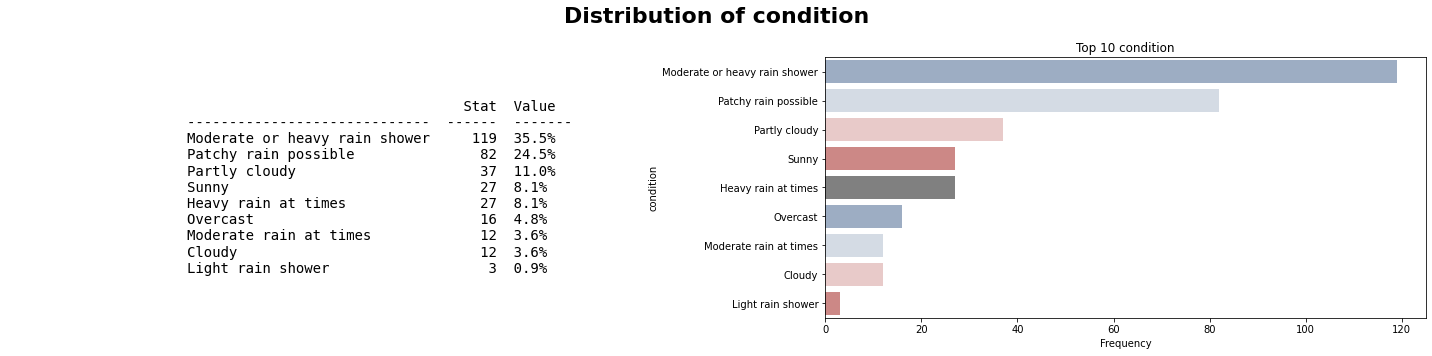

In [11]:
# create a function for Univariate Exploration 
# used for number - numeric_columns
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)

#numeric_columns = [maxtemp_c]

def Uni_analysis_cate_cols(data):
    datetime_columns, categorical_columns, numeric_columns = data_types_list(day_weather)
    for col in categorical_columns:
        # set up the figure with 3 subplots 
        plt.figure(figsize=(20,5))
        plt.suptitle ('Distribution of {}'.format(col),fontweight = 'bold', color = 'black', fontsize=22)
        plt.gcf().autofmt_xdate()
    
        # Subplot 1: Statistical summary
        plt.subplot(1,2,1)
                              
        #stats_summary = data[col].describe().reset_index()
        #stats_summary.columns = ['Stat','Value']
        #stats_summary['Value']= stats_summary['Value'].round(1)
        
        # Count unique values and their percentages:
        unique_counts = data[col].value_counts()
        percentage_counts = data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        stats_summary = pd.DataFrame({'Unique Values': unique_counts, 'Percentage (%)': percentage_counts})
        stats_summary = stats_summary.reset_index().rename(columns= {'index':col})
                      
        stats_tbl = tabulate(stats_summary, headers = ['Stat','Value'], tablefmt='simple', showindex=False)
        plt.text(0.3,0.5, stats_tbl,va='center', fontfamily='monospace',fontsize=14)
        plt.axis('off')
        plt.xlabel('Statictis Summary')
        
        # Subplot 2:
        # Subplot 2: Bar chart
        #plt.subplot(2,2,2)
        plt.subplot(1,2,2)
        
        Palette = ['#97acc9','#D1DAE7','#EDC5C4','#D87D7A','grey']
        value_counts = data[col].value_counts().head(10)
        labels = value_counts.index

        #sns.barplot(x=value_counts.index, y = value_counts.values, palette = Palette)
        #plt.ylabel('Frequency')
        
        #sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
        sns.barplot(x=value_counts.values, y=value_counts.index, palette=Palette)
        plt.xlabel('Frequency')
        plt.ylabel(col)
        plt.title('Top 10 {}'.format(col))
        # Subplot 3: Box plot
        #plt.subplot(2,2,4)

        plt.tight_layout()
        plt.show()
        
# Show the results
categorical_columns
Uni_analysis_cate_cols(day_weather)


## Create a model to estimate temperature varibles
------
Creating a model to estimate the maximum, minimum, and average temperatures for the next 30 days typically involves time series forecasting. Time series forecasting is a common approach for predicting future values based on historical data. In this case, historical weather data can be used to train a forecasting model. Here's a high-level overview of the steps to create such a model:

1. Data Preparation:
- Gather historical weather data, including maximum, minimum, and average temperatures for a significant period.
- Organize the data with a temstamp (date) column.

2. Data Exploration (Optional for Model Building):
Perform exploratory data analysis (EDA) to understand data patterns, trends, and seasonal variations.

3. Feature Engineering (Optional):
Create additional features, such as lagged temperature values or weather-related features (e.g., humidity, wind speed), if they can improve the model's performance.

4. Train-Test Split:
Split the historical data inot a training set and a testing set. You may reserve the most the mose recent data (e.g, the last 7 days) for testing.

5. Model selection:
Choose an appropriate time series forecasting model. Common choices include:
ARIMA (AutoRegressive Integrated Moving Average)
Seasonal Decomposition of Time Series (STL)
Prophet
Exponential Smoothing methods
LSTM (Long Short-Term Memory) neural networks

6. Model Training:
Train the selected model on the training data. The model should predict maximum, minimum and average temperatures separately.

7.Hyperparameter Tuning (Optional):
Fine-tune model hyperparameters to optimize performance. This might involve grid search or random search.

8. Model Evaluation:
Evaluate the model' performance on the testing dataset using appropriate evaluation metrics (e.g. Mean Absolute Error, Root Mean Squared Error, Mean Absolute Percentage Error).

9. Forecasting for the Next 30 days:
Use the trained model to forecast maximum, minimum, and average temperatures for the next 7 days. You'll need to provide starting values for these forecasts, which could be the most recent data available.

10. Visualization:
Visualize the forecasted temperatures along with confidence intervals, if available, to convey incertainty.

11. Model Deployment (Optimal):
If you intend to use this model for ongoing forecasting, consider deploying it in a production enviroment.

12. Monitoring and Maintenance (If deployed):
Continuously minitor the model's performance and retrain it periodically with new data to keep it up to date.

The choice of the forecasting model and specific implementation details can vary depending on the dataset's characteristics and the tools or programming languages you prefer. Time series forecasting libraries in Python, such as statsmodels, Prophet, and TensorFlow/Keras for neural networks, can be valuable for implementing this workflow.

### Step 1. Data Preparation 
------


In [12]:
# Step 1: Data preparation 
 ## Create a sub-dataset with temperature variables
temp_data = day_weather[['date', 'maxtemp_c','maxtemp_f','mintemp_c','mintemp_f','avgtemp_c','avgtemp_f']]
temp_data.head(5)

,date,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f
0,2022-10-01,28.9,83.9,24.2,75.6,25.6,78.1
1,2022-10-02,27.3,81.1,23.9,75.0,25.0,77.1
2,2022-10-03,31.5,88.7,23.8,74.8,26.9,80.4
3,2022-10-04,31.6,88.9,24.2,75.6,26.9,80.4
4,2022-10-05,31.3,88.3,24.0,75.2,27.1,80.7


### Step 2. Data Exploratory Analysis
-------

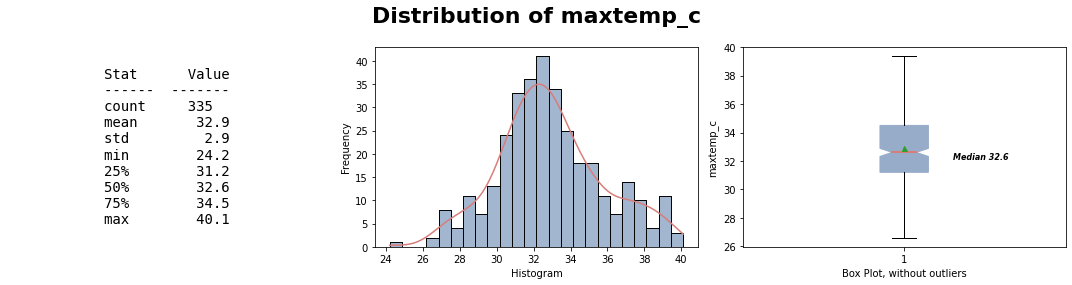

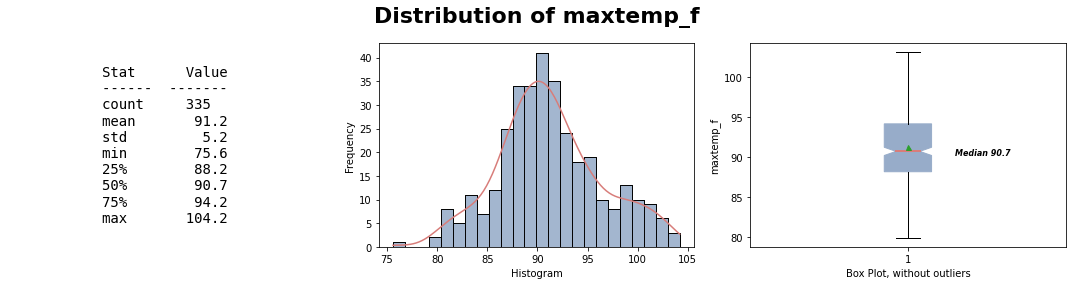

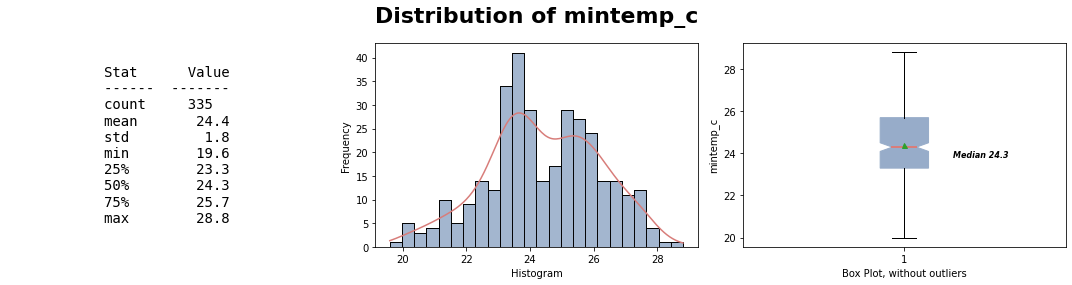

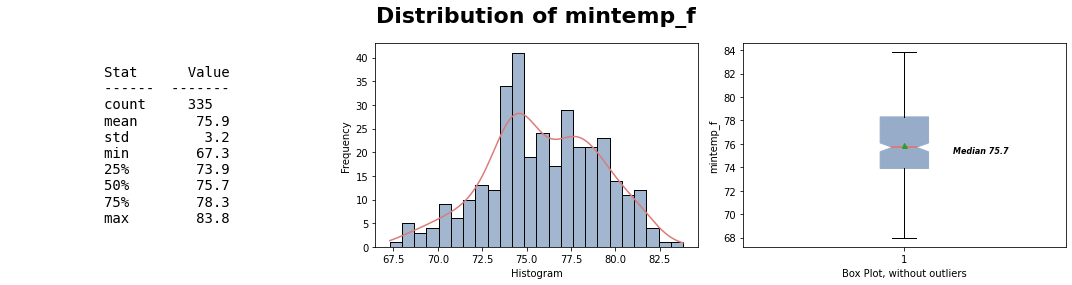

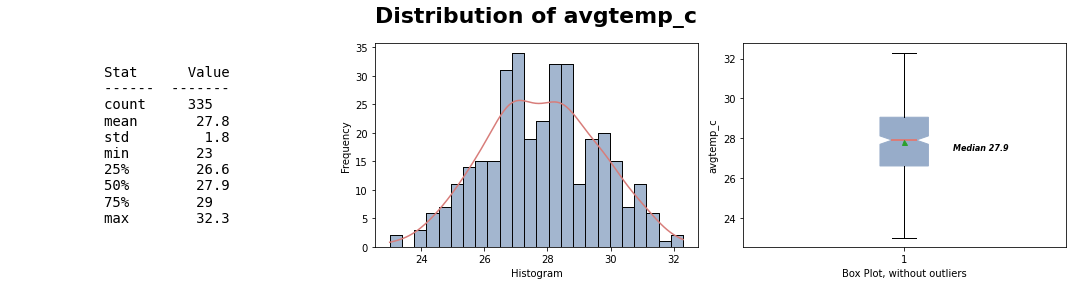

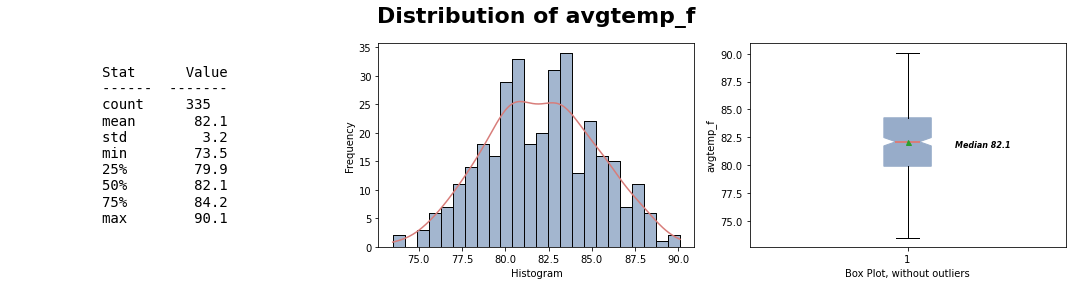

In [13]:
 # Summary stastictics and Distribution of temperature variables
Uni_analysis_num_cols(temp_data)

### Comments about the distribution of temperature variables 

- The maximum temperature in Celsius varies from a minimum of 24.20°C to a maximum of 40.10°C. The average maximum temperature over the dataset period is 32.90°C with a relatively low standard deviation of 2.87°C, indicating that maximum temperatures tend to be consistent.
- In Fahrenheit, the maximum temperature ranges from a minimum of 75.60°F to a maximum of 104.20°F. The average maximum temperature is 91.21°F. The standard deviation of 5.16°F suggests some variability in maximum temperatures.
- Minimum temperatures in Celsius range from 19.60°C to 28.80°C, with an average minimum temperature of 24.40°C and a low standard deviation of 1.76°C. This indicates relatively stable minimum temperature conditions.
- In Fahrenheit, minimum temperatures vary between 67.30°F and 83.80°F, with an average of 75.92°F. The standard deviation of 3.17°F indicates some variability in minimum temperatures.
- The average temperature in Celsius ranges from 23.00°C to 32.30°C, with an average of 27.82°C. The standard deviation of 1.78°C suggests moderate variability in average temperatures.
- In Fahrenheit, average temperatures vary between 73.50°F and 90.10°F, with an average of 82.07°F. The standard deviation of 3.19°F indicates some variability in average temperatures.

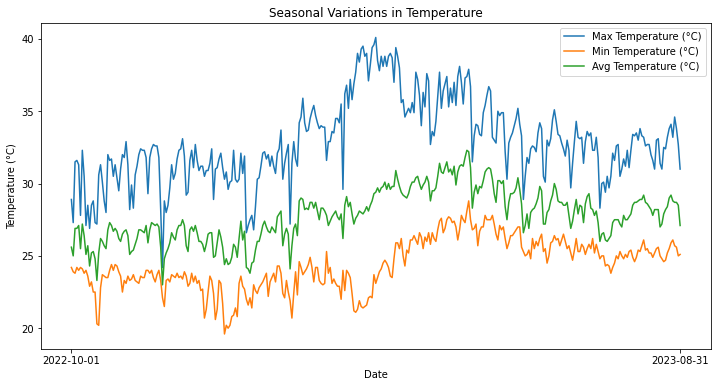

In [213]:
# Seasonal variations in temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_data, x='date', y='maxtemp_c', label='Max Temperature (°C)')
sns.lineplot(data=temp_data, x='date', y='mintemp_c', label='Min Temperature (°C)')
sns.lineplot(data=temp_data, x='date', y='avgtemp_c', label='Avg Temperature (°C)')
plt.title('Seasonal Variations in Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 12)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
first_date = temp_data['date'].min()
last_date = temp_data['date'].max()
plt.xticks([first_date, last_date])

plt.show()

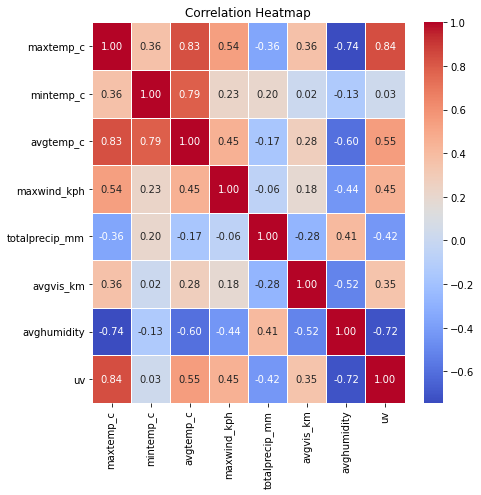

In [229]:
# Correlation heatmap
correlation_matrix = day_weather[[ 'maxtemp_c', 'mintemp_c','avgtemp_c', 'maxwind_kph', 'totalprecip_mm', 'avgvis_km', 'avghumidity', 'uv']].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Interpret the findings and make notes (Optional)

# You can further explore the data as per your analysis requirements.

### Interpret the findings and make notes (Optional)
Based on the correlation matrix provided by the weather-related variables, here are some findings:
1. Max Temperature (maxtemp_c):
* Strong positive correlation with avgtemp_c (0.83): This suggests that as the maximum temperature increases, the average temperature tends to increase as well, which is expected.
* Moderate positive correlation with maxwind_km (0.54): Higher maximum temperatures are somewhat associated with stronger maximum wind speed, but the correlation is not extremely string.
* Strong negative correlation with avghumidity (-0.74): As the maximum temperature increases, the average himidity tends to decrease significantly. This is expected since hotter days are often less humid.
* Strong positive correlation with uv Index (0.84): Higher maximum temperatures are associated with higher UV indices, which makes sense as both are related to sunny and warm weather.

2. Min Temperature (mintemp_c):
* Strong positive correlation with  avgtemp_c (0.79): Similar to max temperature, the minimum temperature also has a strong positive relationship with the average temperature.
* Weak positive correlation with maxwind_kph (0.23): There is a slight positive relationsip between minimum temperature and maximum wind speed.
* Weak positive correlation totalprecip_mm (0.2): slighter warmer nights may be associated with slightly more precipitation.

3. Average Temperature (avgtemp_c):
* Strong positive correlation with maxtemp_c (0.83) and mintemp_c (0.79).
* Moderate positive correlation with maxwind_kph (0.45) Average temperature and Max wind speed are somewhat correlated.
* Strong negative correlation with avghumidity (-0.60). Hotter days tend to have lower humidity, which is a common weather pattern.
* Moderate positive correlation with UV index (0.55). As average temperature increases, the UV index tends to be higher.

4. Maximum Wind Speed (maxwind_kph): 
* Moderate negative correlation with maxtemp_c (-0.54) and moderate positive correlation with avgtemp_c (0.45). Wind speed and temperature are somewhat related, with windy conditions possibly occuring on warmer days.

5. Total Precipitation (totalprecip_mm):
* Weak negative correlation with maxtemp_c (-0.36). There is a slight negative relationship between maximum temperature and Total precipitation. Hotter days may have less precipitation.
* Weak positive correlation with mintemp_c (0.2). Slightly warmer nights may be associated with slightly more precipitation.

6. Average Visibility (avgvis_km):
* Weak position correlation with maxtemp_c (0.36) and avgtemp_c (0.2). Visibility tends to be slightly better on warmer days.
* Moderate negative correlation with avghumidity (-0.52). As humidity decreases, visibility tends to be better, which is expected.

7. Average Humidity (avghumidity):
* Strong negative correlation with maxtemp_c (-0.74) and avgtemp_c (-0.60). Higher temperatures are associated with lower humidity, which is typical in warm weather.
* strong negative correlation with UV index (-0.72). As humidity decreases, the UV index tends to be higher.

8. UV index (uv):
* Strong positive correlation with maxtemp_c (0.84) and avgtemp_c (0.55) and strong negative correlation with avghumidity (-0.72). UV index tends to be higher on hotter days and lower on more humid days.

These correlations provide valuable insights into how these weather-related variables are interrelated and can be used to inform further analysis and modeling. It's important to note that correlation does not imply causation, and other factors not considered in this analysis may also influence these relationships.

####

## Weather Forecast using SARIMA model -- Maximum temperature variable

We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend and noise in data:

We will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMA() function from the statsmodels module and assess its overall quality.


In [22]:
# Inspect the first 5 rows and the last 5 rows from the data
from IPython.display import display
display(data.head(5))
display(data.tail(5))


,maxtemp_c
date,
2022-10-09,27.1
2022-10-10,28.5
2022-10-11,26.9
2022-10-12,28.5
2022-10-14,27.3


,maxtemp_c
date,
2023-08-27,33.2
2023-08-28,34.6
2023-08-29,33.8
2023-08-30,32.7
2023-08-31,31.0


In [23]:
#Output the maximum and minimum temperature date
print(data.loc[data['maxtemp_c']== data['maxtemp_c'].max()])
print(data.loc[data['maxtemp_c']== data['maxtemp_c'].min()])

            maxtemp_c
date                 
2023-03-22       38.8
2023-03-29       38.8
            maxtemp_c
date                 
2022-11-20       24.2


Hochiminh city witnessed the hottest date on 22 & 29 Mar 2023. The temperature was 38.8 degrees Celsius. In contrast, on 20 Nov 2022, HCM citizens saw the coldest date, when the temperature dropped to 24.2 degrees Celsius

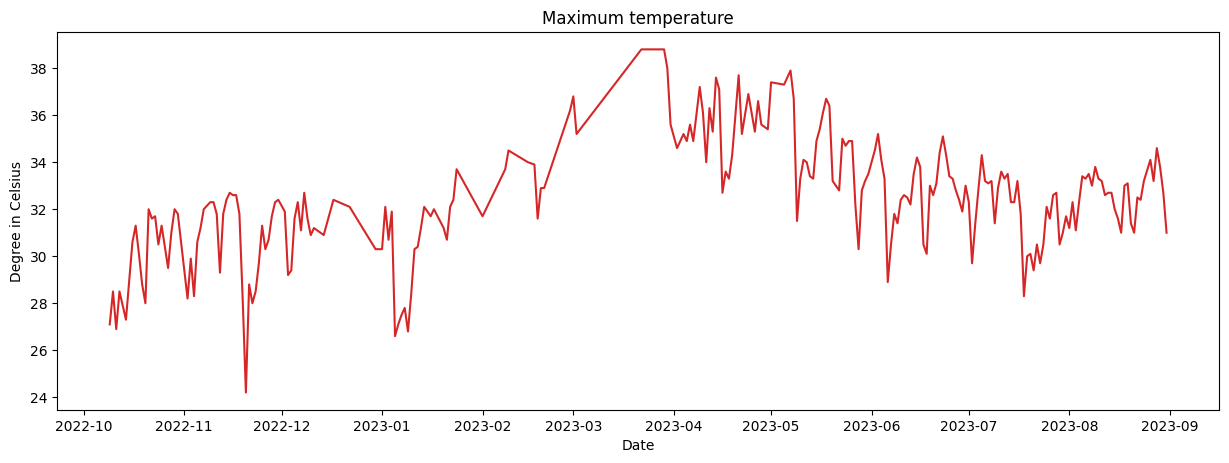

In [55]:
# Plot the daily temperature change
plt.figure(figsize = (15,5), dpi=100)
plt.plot(data.index, data.maxtemp_c, color='tab:red')
plt.gca().set(title="Maximum temperature", xlabel = 'Date', ylabel= 'Degree in Celsius')
plt.show()

<Axes: xlabel='date'>

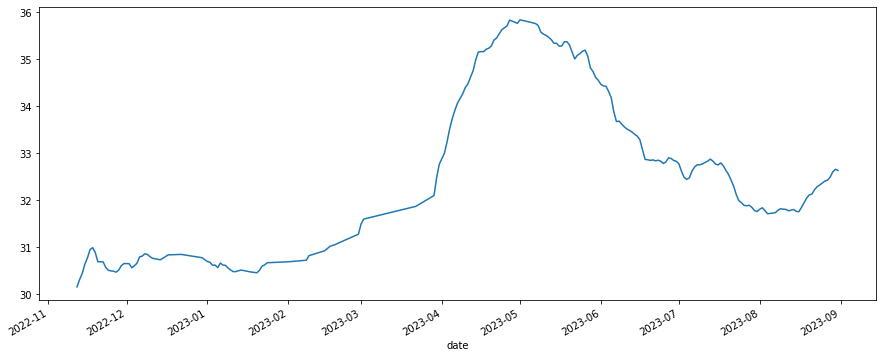

In [25]:
# Apply the Moving Average function by a subset of size 30 days.
data_mean = data.maxtemp_c.rolling(window=30).mean()
data_mean.plot(figsize=(15,6))

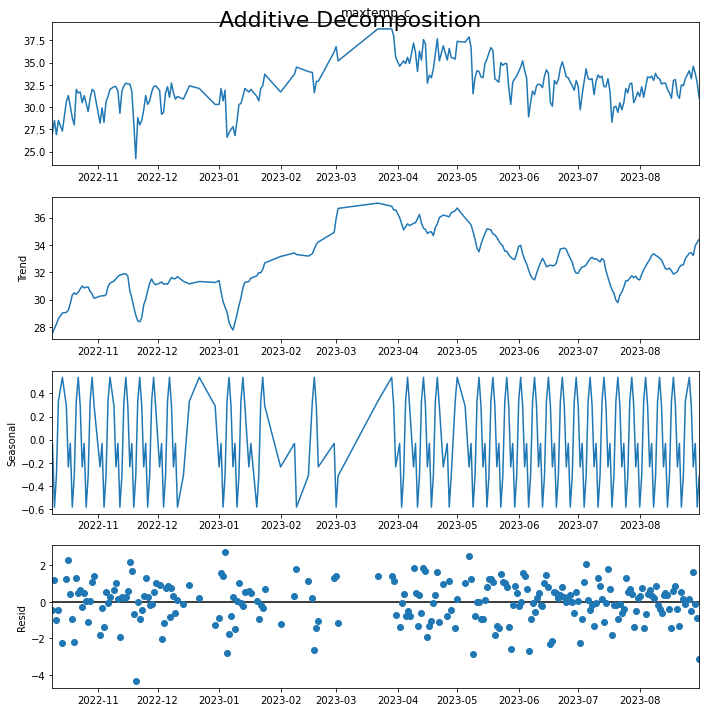

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(data.maxtemp_c, model='additive', extrapolate_trend='freq', period=7)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

## Baseline Model
Since the change of temperature is not significant between 2 days, it is reasonable to produce a most basic model in which it uses the current temperature as a prediction for the next day.

Thus, we would predict the weather based on an assumption: The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on.

Here, we use 1-step prediction to model the temperature as a time series:

In [27]:
# Shift the current temperature to the next day
predicted_df = data['maxtemp_c'].to_frame().shift(1).rename(columns = {'maxtemp_c':'maxtemp_c_pred'})
actual_df = data['maxtemp_c'].to_frame().rename(columns={'maxtemp_c':'maxtemp_c_actual'})

# Concate the actual and predicted temperature
one_step_df = pd.concat([predicted_df, actual_df], axis=1)
# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,maxtemp_c_pred,maxtemp_c_actual
date,,
2022-10-10,27.1,28.5
2022-10-11,28.5,26.9
2022-10-12,26.9,28.5
2022-10-14,28.5,27.3
2022-10-16,27.3,30.6
2022-10-17,30.6,31.3
2022-10-18,31.3,30.1
2022-10-19,30.1,28.8
2022-10-20,28.8,28.0


## Validate the model by the Root Mean Squared Error (RMSE)

In [28]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.maxtemp_c_actual, one_step_df.maxtemp_c_pred, squared=False)
print('The RMSE is ', temp_pred_err)

The RMSE is  1.500680401240273


The RMSE is small,meaning that we can use 1-step prediction baseline model to predict the upcomong day's temperature with the average error of only 1.5 degrees Celsius.

## Parameter Selection

**Grid Search**

SARIMA is one of the most commonly used method for time-series forecasting, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,2). These three parameters account for seasonality, trend, and noise in data:

We will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with SARIMA() function from the statsmodels and assess its overall quality.

In [29]:
import itertools

# Define the p, d, and q parameters to take any value between 0 and 2.
p = d = q = range(0,2)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, d, and q triples
seasonal_pdq= [(x[0],x[1], x[2],12) for x in list(itertools.product(p,d,q))]


print('Examples of parameter combinations for seasonal SARIMA...')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal SARIMA...
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Import the statsmodels library for using SARIMA model
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.maxtemp_c_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2345.2831539215294
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1970.7929433325414
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1063.8933106264037
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:987.5115003331343
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1070.0739196049528
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1040.988833726105
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1000.5733989883162
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:978.9126955410445
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2021.9507365675852
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1683.34026679198
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:975.9190217644193
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:874.7401193398165
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:988.340879559383
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:929.5049696636324
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:901.3456154367784
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:876.9869530937624
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:870.6249305381459
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:824.16

In [31]:
print('The min AIC value is {}'.format(results.aic.min()))
print('The min AIC value is SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic.min()))

The min AIC value is 790.4441356129263
The min AIC value is SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:790.4441356129263


The AIC measures how well a model fits the data while taking into the overall complexity of the model. 
The output suggests that SARIMA(1,1,1)x(1,1,1,12)12 yields the lowest AIC value of 790.44. We should therefore consider this to be optimal option out of all the models we have considered.

## Fitting the Model

In [32]:
# Fit the SARIMA model using the optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.maxtemp_c_actual,
                               order=(1,1,1),
                               seasonal_order=(1,1,1,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()

## Model Diagnostics

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior:

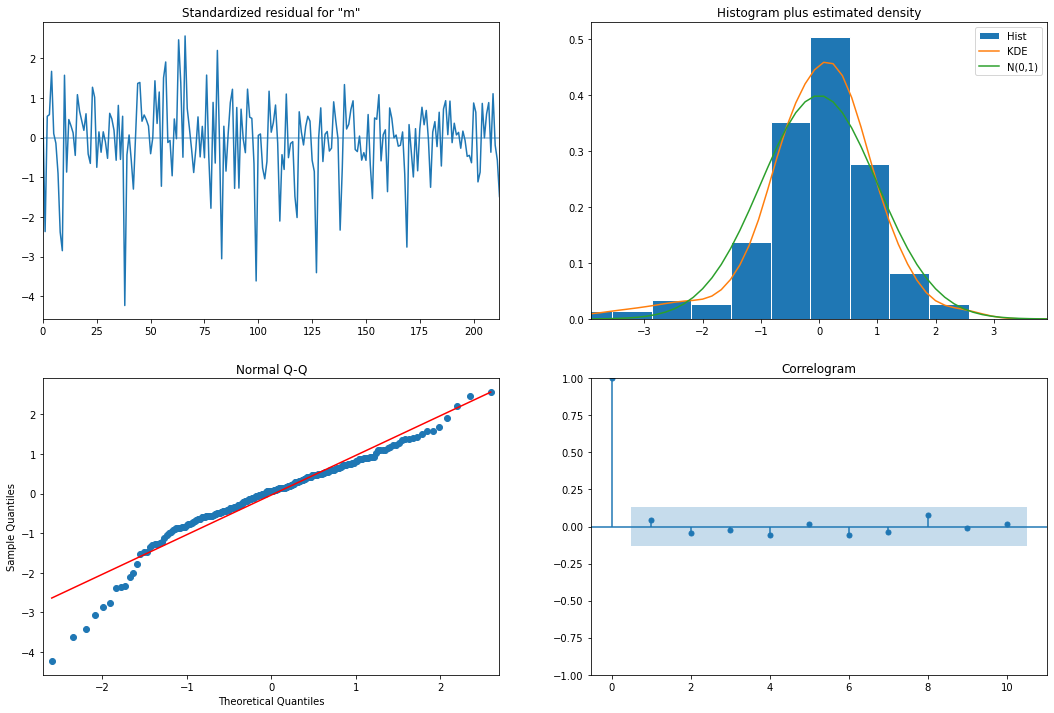

In [33]:
results.plot_diagnostics(figsize=(18,12))
plt.show()

Conlusion: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.

## Validating the Non-Dynamic Forecast

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'),dynamic=False)
pred_ci = pred.conf_int()
# The dynamic=False augrument ensures that we produce one-step ahead forecasts
#, meaning that forecasts at each pointare generated using the full history up to that point.

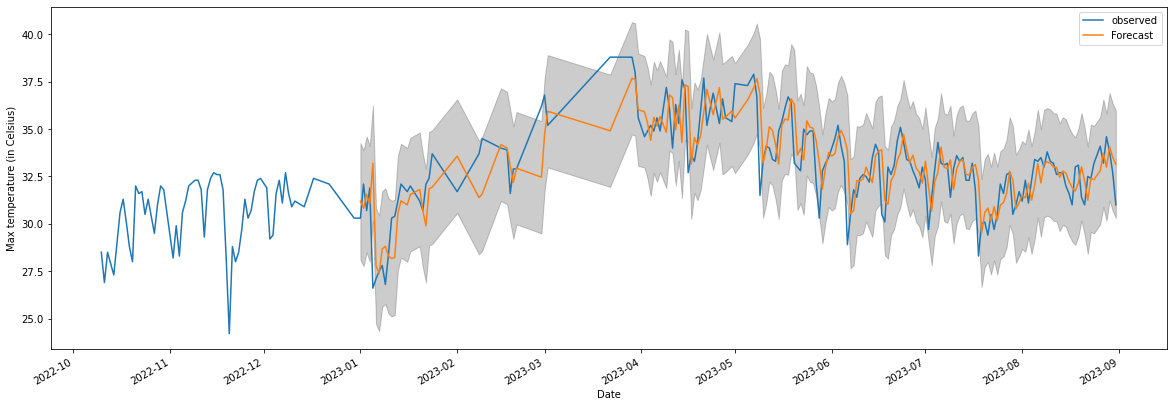

In [35]:
# Plot the real and forecasted values of the maximum daily temperature to assess how well the model is.
ax = one_step_df.maxtemp_c_actual.plot(label='observed', figsize=(20,7))
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Max temperature (in Celsius)')
plt.legend()
plt.show()


Overall, the forecasts align with the true values well.

## Forecast Diagnostic


In [36]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.maxtemp_c_actual['2023-01-01':]
print(y_forecasted.shape)
print(y_truth.shape)

# Compute the mean square error
mse = MSE(y_truth,y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

(179,)
(179,)
The Mean Squared Error of our forecasts is 2.22


**The forecast model forecasts the temperature with only an error of 2.22 degrees Celsius**

## Forecast next 30 days --- Output

In [57]:
# Define the number of periods you wnat to forecast into the futire
forecast_periods = 30 # Change this to the desired number of periods

# Get the forecast for the future periods
forecast = results.get_forecast(steps = forecast_periods)

# Set forecast_index

forecast_start_date = one_step_df.index[-1] + pd.Timedelta(days=1)  # Assuming daily frequency
forecast_end_date = forecast_start_date + pd.DateOffset(days=forecast_periods - 1)
forecast_index = pd.date_range(forecast_start_date, forecast_end_date)
forecast_index

# extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Set the forecasted values and confidence intervals index to the forecast_index
forecasted_values.index = forecast_index
confidence_intervals.index = forecast_index

# print or use the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecasted_values)

print("\nConfidence Intervals:")
print(confidence_intervals)

# Export the DataFrame to a CSV file
forecasted_values.to_csv('forecasted_values.csv', index=False)

Forecasted Values:
2023-09-01    30.966548
2023-09-02    31.509119
2023-09-03    32.298456
2023-09-04    32.259920
2023-09-05    32.291853
2023-09-06    32.345179
2023-09-07    32.311466
2023-09-08    32.439989
2023-09-09    32.486715
2023-09-10    32.490353
2023-09-11    32.427116
2023-09-12    32.704553
2023-09-13    32.045662
2023-09-14    32.202822
2023-09-15    32.757176
2023-09-16    32.578737
2023-09-17    32.523598
2023-09-18    32.525064
2023-09-19    32.460441
2023-09-20    32.567601
2023-09-21    32.604378
2023-09-22    32.599400
2023-09-23    32.530050
2023-09-24    32.801656
2023-09-25    32.142067
2023-09-26    32.298807
2023-09-27    32.852903
2023-09-28    32.674302
2023-09-29    32.619067
2023-09-30    32.620472
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower maxtemp_c_actual  upper maxtemp_c_actual
2023-09-01               28.131386               33.801710
2023-09-02               28.030104               34.988134
2023-09-03     

## Visualize the forecast values and confidence_intervals

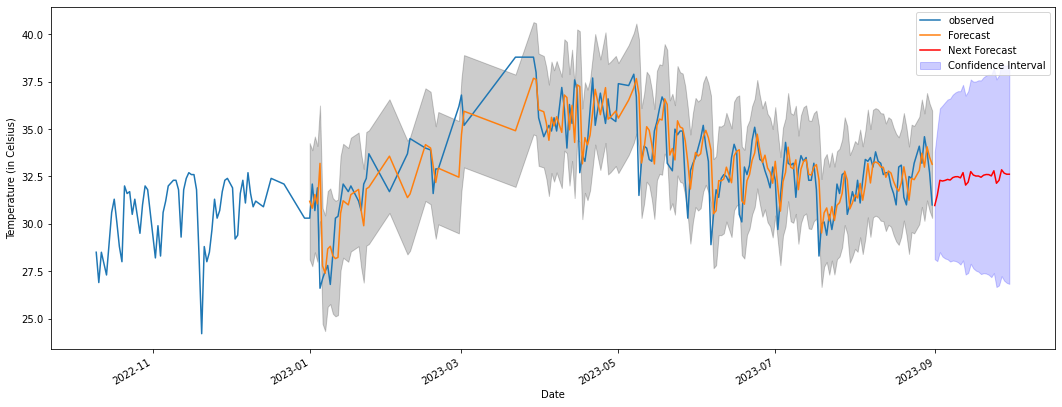

In [43]:
# Visualize the results
ax = one_step_df.maxtemp_c_actual.plot(label='observed', figsize=(18,7))
pred.predicted_mean.plot( label='Forecast')
forecasted_values.plot(label='Next Forecast', color = 'red')

# Plot the forecasted values
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=.2)


# Plot the forecasted values
ax.fill_between(confidence_intervals.index
               , confidence_intervals.iloc[:, 0]
                , confidence_intervals.iloc[:, 1], color='b', alpha=.2
                , label='Confidence Interval')
ax.set_xlabel("Date")
ax.set_ylabel('Temperature (in Celsius)')
plt.legend()
plt.show()


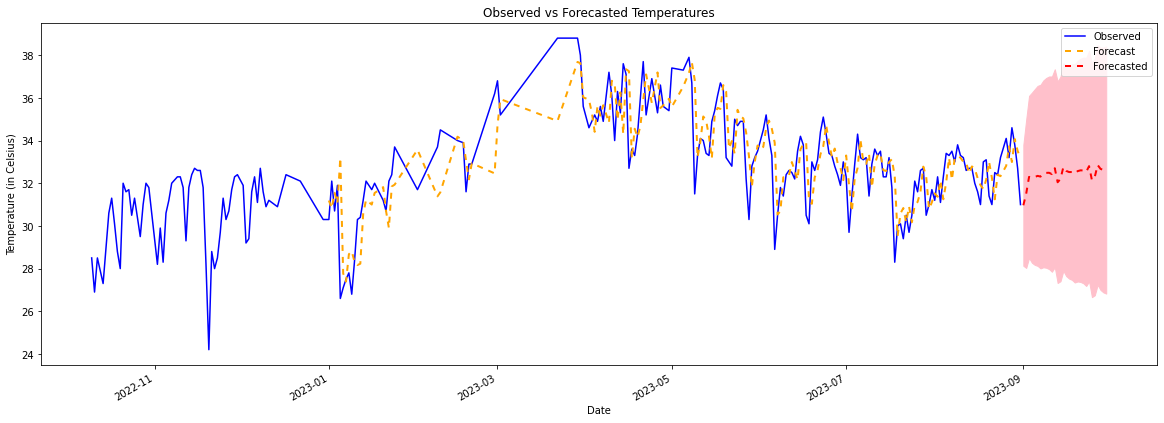

In [53]:
# Plot observed data
one_step_df.maxtemp_c_actual.plot(label='Observed', color='blue', figsize=(20,7))
space =3
dash_len = 3
pred.predicted_mean.plot( label='Forecast',color='orange', linestyle='--', dashes= (dash_len,space), lw=2)
# Plot forecasted data
forecasted_values.plot(label='Forecasted', color='red', linestyle='--', dashes= (dash_len,space), lw=2)

# Fill between confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')

plt.xlabel("Date")
plt.ylabel('Temperature (in Celsius)')
plt.legend()
plt.title("Observed vs Forecasted Temperatures")
plt.show()